## 04_05: Function decorators

In [1]:
import math
import functools

In [2]:
from turtle import Turtle, Terrarium

In [3]:
def printargs(inputfunc):
    def outputfunc(*args, **kwargs):
        print("Function {} called with args = {} and kwargs = {}".format(inputfunc.__name__, args, kwargs))
        
        return inputfunc(*args, **kwargs)
    
    return outputfunc

In [4]:
@printargs
def fibonacci(n):
    """Return a number in the Fibonacci sequence."""
    
    # the first two numbers in the sequence are both 1
    if n < 2:
        return 1
    
    # every other number is the sum of the two before it
    return fibonacci(n-1) + fibonacci(n-2)

In [5]:
fibonacci(5)

Function fibonacci called with args = (5,) and kwargs = {}
Function fibonacci called with args = (4,) and kwargs = {}
Function fibonacci called with args = (3,) and kwargs = {}
Function fibonacci called with args = (2,) and kwargs = {}
Function fibonacci called with args = (1,) and kwargs = {}
Function fibonacci called with args = (0,) and kwargs = {}
Function fibonacci called with args = (1,) and kwargs = {}
Function fibonacci called with args = (2,) and kwargs = {}
Function fibonacci called with args = (1,) and kwargs = {}
Function fibonacci called with args = (0,) and kwargs = {}
Function fibonacci called with args = (3,) and kwargs = {}
Function fibonacci called with args = (2,) and kwargs = {}
Function fibonacci called with args = (1,) and kwargs = {}
Function fibonacci called with args = (0,) and kwargs = {}
Function fibonacci called with args = (1,) and kwargs = {}


8

In [6]:
fibonacci

<function __main__.printargs.<locals>.outputfunc(*args, **kwargs)>

In [7]:
help(fibonacci)

Help on function outputfunc in module __main__:

outputfunc(*args, **kwargs)



In [8]:
def printargs(inputfunc):
    @functools.wraps(inputfunc)
    def outputfunc(*args, **kwargs):
        print("Function {} called with args = {} and kwargs = {}".format(inputfunc.__name__, args, kwargs))
        
        return inputfunc(*args, **kwargs)
    
    return outputfunc

In [9]:
@printargs
def fibonacci(n):
    """Return a number in the Fibonacci sequence."""
    
    if n < 2:
        return 1

    return fibonacci(n-1) + fibonacci(n-2)

In [10]:
fibonacci

<function __main__.fibonacci(n)>

In [11]:
help(fibonacci)

Help on function fibonacci in module __main__:

fibonacci(n)
    Return a number in the Fibonacci sequence.



In [12]:
@functools.lru_cache(maxsize=None)
@printargs
def fibonacci(n):
    """Return a number in the Fibonacci sequence."""
    
    if n < 2:
        return 1

    return fibonacci(n-1) + fibonacci(n-2)

In [13]:
fibonacci(5)

Function fibonacci called with args = (5,) and kwargs = {}
Function fibonacci called with args = (4,) and kwargs = {}
Function fibonacci called with args = (3,) and kwargs = {}
Function fibonacci called with args = (2,) and kwargs = {}
Function fibonacci called with args = (1,) and kwargs = {}
Function fibonacci called with args = (0,) and kwargs = {}


8

In [14]:
fibonacci(5)

8

In [15]:
def quartercircle(t, radius):
    for a in range(90):
        t.forward(0.5 * math.pi * radius / 90)
        t.left(1)

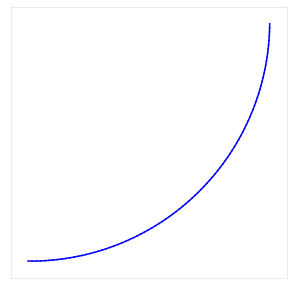

In [16]:
with Terrarium() as t:
    quartercircle(Turtle(t), 1)

In [17]:
def QC(radius):
    return functools.partial(quartercircle, radius=radius)

In [18]:
spiral = [QC(fibonacci(i)) for i in range(10)]

Function fibonacci called with args = (6,) and kwargs = {}
Function fibonacci called with args = (7,) and kwargs = {}
Function fibonacci called with args = (8,) and kwargs = {}
Function fibonacci called with args = (9,) and kwargs = {}


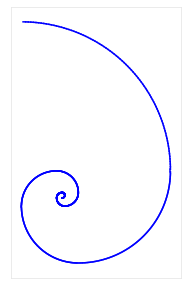

In [19]:
with Terrarium() as t:
    Turtle(t).run(spiral)

In [20]:
twice = lambda x: 2*x

In [21]:
twice(3)

6

In [22]:
(lambda x: 2*x)(4)

8

In [23]:
fibonacci10 = [fibonacci(i) for i in range(10)]

In [24]:
map(twice, fibonacci10)

In [25]:
list(map(twice, fibonacci10))

[2, 2, 4, 6, 10, 16, 26, 42, 68, 110]

In [26]:
list(filter(lambda x: x % 2 == 0, fibonacci10))

[2, 8, 34]

In [27]:
functools.reduce(lambda x,y: x+y, fibonacci10)

143